# Proyecto Final Integrador
## Equipo 4

## Predicción de riesgo de default en microcréditos, con datos de Lending Club (2007-2015) 
Predicting Microloan default risk with Lending Club data (2007-2015)

## Introduction

Estamos interesados en usar modelos predictivos para evaluar riesgo en microcréditos, como los otorgados por la fintech local Afluenta.
Encontramos un dataset de Lending Club en Kaggle, con features muy similares, y 2.2 millones de observaciones. 



Pueden ver más información sobre Afluenta en  www.afluenta.com 
y el dataset de Lending Club en: https://www.kaggle.com/wendykan/lending-club-loan-data



### Contenido:

00 - Data Load <br>
01 - Exploratory Data Analysis <br>
02 - Data Cleaning and Transformation <br>
03 - Benchmark - Average, Naive Gauss <br>
04 - KNN, Logistic Regression <br>
05 - Decision Tree, Random Forest <br>
06 - XGBoost <br>
07 - Feature Engineering <br>
08 - GridSearch <br>
09 - Pipeline and final model <br>
10 - Results <br>
11 - Sources and credits <br>

## Paso 0: Data load

In [2]:
# Importamos las librerías
import pandas as pd


# Opcionesd de configuración para poder visualizar el dataset
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 200)

In [3]:
# Full version para modelo final
# df = pd.read_csv('loan.csv',parse_dates=['issue_d'])


# Muestreo para Exploratory Data Analysis y testeo de modelos
df = pd.read_csv('loan.csv',parse_dates=['issue_d']).sample(1000)

C:\Users\Usuario\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = pd.DataFrame(df)

In [5]:
df_description = pd.read_excel('LCDataDictionary.xlsx')

## Paso 1: Análisis Exploratorio

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 756661 to 657472
Columns: 145 entries, id to settlement_term
dtypes: datetime64[ns](1), float64(105), int64(4), object(35)
memory usage: 1.1+ MB


In [7]:
df.describe

<bound method NDFrame.describe of          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
756661  NaN        NaN       5000         5000      5000.000000   36 months   
1110446 NaN        NaN      12000        12000     12000.000000   36 months   
552577  NaN        NaN       8400         8400      8400.000000   36 months   
1104699 NaN        NaN       7025         7025      7025.000000   36 months   
114998  NaN        NaN      18000        18000     18000.000000   36 months   
703871  NaN        NaN      32000        32000     32000.000000   36 months   
45207   NaN        NaN      40000        40000     40000.000000   60 months   
362983  NaN        NaN       3600         3600      3600.000000   36 months   
376154  NaN        NaN      20000        20000     20000.000000   36 months   
155929  NaN        NaN      10000        10000     10000.000000   60 months   
2035783 NaN        NaN       5775         5775      5775.000000   36 months   
810914  NaN       

In [8]:
df.shape

(1000, 145)

In [9]:
df.sample(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
114091  NaN        NaN       3000         3000           3000.0   36 months   
1814102 NaN        NaN       6800         6800           6800.0   36 months   
394393  NaN        NaN       8800         8800           8800.0   36 months   
1102485 NaN        NaN      18000        18000          18000.0   60 months   
850875  NaN        NaN      20000        20000          20000.0   60 months   
426475  NaN        NaN      12000        12000          12000.0   36 months   
1104699 NaN        NaN       7025         7025           7025.0   36 months   
432048  NaN        NaN      20000        20000          20000.0   36 months   
138786  NaN        NaN       6000         6000           6000.0   36 months   
1003811 NaN        NaN       7000         7000           7000.0   36 months   

         int_rate  installment grade sub_grade  \
114091       6.11        91.42     A        A1   
1814102      6.03       206.97     A        A1   
394393      20.39       328.80     D        D4   
1102485     15.61       434.01     D        D1   
850875      18.99       518.71     D        D3   
426475       6.08       365.50     A        A2   
1104699     18.55       255.92     E        E2   
432048      15.05       693.80     C        C4   
138786      16.91       213.65     C        C5   
1003811      6.89       215.79     A        A3   

                               emp_title emp_length home_ownership  \
114091                         Security     2 years       MORTGAGE   
1814102  Space Exploration Technologies     4 years       MORTGAGE   
394393                            Genius  10+ years           RENT   
1102485                      Agent Owner  10+ years       MORTGAGE   
850875     Software Development Manager     5 years           RENT   
426475            Veterinarian and owner  10+ years       MORTGAGE   
1104699           Maintenance Supervisor   < 1 year       MORTGAGE   
432048                             Owner  10+ years       MORTGAGE   
138786                Research Assistant    2 years           RENT   
1003811                            sales  10+ years       MORTGAGE   

         annual_inc verification_status    issue_d loan_status pymnt_plan  \
114091      40000.0     Source Verified 2018-10-01     Current          n   
1814102    109000.0        Not Verified 2012-12-01  Fully Paid          n   
394393      45000.0        Not Verified 2018-03-01     Current          n   
1102485    107000.0        Not Verified 2015-08-01  Fully Paid          n   
850875     150000.0     Source Verified 2016-12-01  Fully Paid          n   
426475     150000.0        Not Verified 2018-02-01     Current          n   
1104699     81000.0     Source Verified 2015-08-01  Fully Paid          n   
432048     100000.0            Verified 2018-02-01     Current          n   
138786      36000.0     Source Verified 2018-09-01     Current          n   
1003811     70000.0        Not Verified 2015-11-01  Fully Paid          n   

         url desc             purpose                    title zip_code  \
114091   NaN  NaN         credit_card  Credit card refinancing    786xx   
1814102  NaN  NaN    home_improvement              Improvement    974xx   
394393   NaN  NaN         credit_card  Credit card refinancing    801xx   
1102485  NaN  NaN  debt_consolidation       Debt consolidation    630xx   
850875   NaN  NaN         credit_card  Credit card refinancing    607xx   
426475   NaN  NaN         credit_card  Credit card refinancing    285xx   
1104699  NaN  NaN               other                    Other    456xx   
432048   NaN  NaN    home_improvement         Home improvement    980xx   
138786   NaN  NaN         credit_card  Credit card refinancing    802xx   
1003811  NaN  NaN         credit_card  Credit card refinancing    282xx   

        addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
114091          TX   4.86          0.0         Apr-2015             

In [10]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

Tenemos 145 features. Para la primer aproximación al problema, vamos a tomar sólo datos de los tomadores de créditos. Podríamos intentar un segundo análisis con los datos de evolución del crédito.

In [11]:
df_description

LoanStatNew  \
0                                acc_now_delinq   
1                          acc_open_past_24mths   
2                                    addr_state   
3                                      all_util   
4                                    annual_inc   
5                              annual_inc_joint   
6                              application_type   
7                                   avg_cur_bal   
8                                bc_open_to_buy   
9                                       bc_util   
10                     chargeoff_within_12_mths   
11                      collection_recovery_fee   
12                   collections_12_mths_ex_med   
13                                  delinq_2yrs   
14                                  delinq_amnt   
15                                         desc   
16                                          dti   
17                                    dti_joint   
18                             earliest_cr_line   
19                                   emp_length   
20                                    emp_title   
21                              fico_range_high   
22                               fico_range_low   
23                                  funded_amnt   
24                              funded_amnt_inv   
25                                        grade   
26                               home_ownership   
27                                           id   
28                                      il_util   
29                          initial_list_status   
30                                       inq_fi   
31                                 inq_last_12m   
32                               inq_last_6mths   
33                                  installment   
34                                     int_rate   
35                                      issue_d   
36                           last_credit_pull_d   
37                         last_fico_range_high   
38                          last_fico_range_low   
39                              last_pymnt_amnt   
40                                 last_pymnt_d   
41                                    loan_amnt   
42                                  loan_status   
43                                   max_bal_bc   
44                                    member_id   
45                           mo_sin_old_il_acct   
46                         mo_sin_old_rev_tl_op   
47                        mo_sin_rcnt_rev_tl_op   
48                               mo_sin_rcnt_tl   
49                                     mort_acc   
50                       mths_since_last_delinq   
51                  mths_since_last_major_derog   
52                       mths_since_last_record   
53                           mths_since_rcnt_il   
54                         mths_since_recent_bc   
55                     mths_since_recent_bc_dlq   
56                        mths_since_recent_inq   
57               mths_since_recent_revol_delinq   
58                                 next_pymnt_d   
59                        num_accts_ever_120_pd   
60                               num_actv_bc_tl   
61                              num_actv_rev_tl   
62                                  num_bc_sats   
63                                    num_bc_tl   
64                                    num_il_tl   
65                                num_op_rev_tl   
66                                num_rev_accts   
67                          num_rev_tl_bal_gt_0   
68                                     num_sats   
69                             num_tl_120dpd_2m   
70                                 num_tl_30dpd   
71                           num_tl_90g_dpd_24m   
72                           num_tl_op_past_12m   
73                                     open_acc   
74                                  open_acc_6m   
75                                  open_il_12m   
76                                  open_il_24m   
77                                  open_act_il   
78     

Estos son los features que tenemos disponibles. Vamos a empezar el análisis para seleccionar el Target. 

#### 4.1: Target

In [39]:
df['loan_status'].value_counts()

Fully Paid            459
Current               429
Charged Off            96
Late (31-120 days)     12
In Grace Period         3
Late (16-30 days)       1
Name: loan_status, dtype: int64

Loan Status es un buen candidato a Target. Charged-off significa que el crédito no fue pagado, y que el acreedor ha dejado de intentar cobrarlo. Fully Paid es el crédito totalmente pago. Una aproximación inicial podría ser descartar los créditos en curso, con mora o no, y quedarnos con los terminados.
Vamos a perder información, ya que los Fully Paid pueden haber tenido una mora y refinanciación.

De todas maneras, el dataset está fuertemente desbalanceado hacia el "cero" del target.

#### 4.2: Features numéricos

Podemos ver los features que tenemos disponibles. Vamos a analizar los siguientes features: <br>
- loan_amnt
- int_rate
- installment
- grade
- subgrade 
- term
- emp_lenght
- annual_income
- delinq_2yrs
- dti
- open_acc

In [12]:
df['loan_amnt'].min()

1000

In [13]:
df['loan_amnt'].max()

40000

In [14]:
df['loan_amnt'].mean()

15648.45

Vamos a usar ```seaborn``` para visualizar las distribuciones

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=7,7


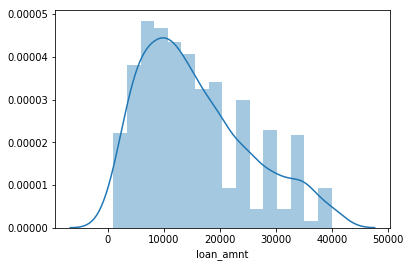

In [16]:
sns.distplot(df['loan_amnt'])

La distibución de los montos es multimodal, aunque concentrada alrededor de la media y con long tail hacia el máximo. Vamos a ver las tasas de interés:

In [17]:
df['int_rate'].min()

5.31

In [18]:
df['int_rate'].max()

30.84

In [19]:
df['int_rate'].mean()

12.634939999999954

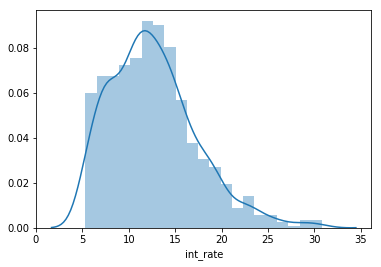

In [20]:
sns.distplot(df['int_rate'])

Es parecida a monto. Vamos a ver correlación con  Seaborn's Kernel Density Estimator (KDE) (https://seaborn.pydata.org/tutorial/distributions.html)

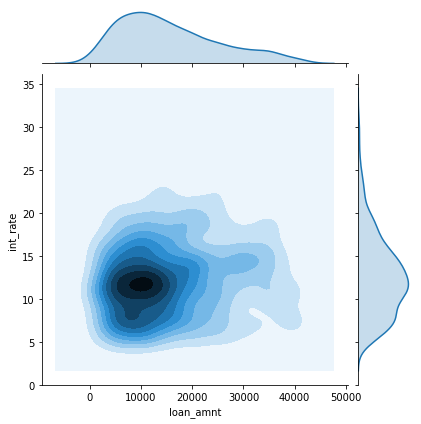

In [31]:
sns.jointplot(x=df['loan_amnt'], y=df['int_rate'], data=df, kind="kde")


Ya tenemos una visión sobre monto e interés. Vamos a ver el resto de los features.

In [33]:
df['term'].value_counts()

 36 months    708
 60 months    292
Name: term, dtype: int64

In [34]:
df['grade'].value_counts()

B    314
C    284
A    217
D    124
E     39
F     17
G      5
Name: grade, dtype: int64

In [35]:
df['sub_grade'].value_counts()

B4    73
B5    70
C1    63
C4    61
B3    60
A1    57
C2    56
B2    56
C5    55
B1    55
A4    50
C3    49
A5    46
A3    39
D3    32
D2    31
D1    26
A2    25
D4    19
D5    16
E1    11
E2    10
E5     9
F1     6
F2     5
E4     5
E3     4
G2     4
F3     3
F5     3
G1     1
Name: sub_grade, dtype: int64

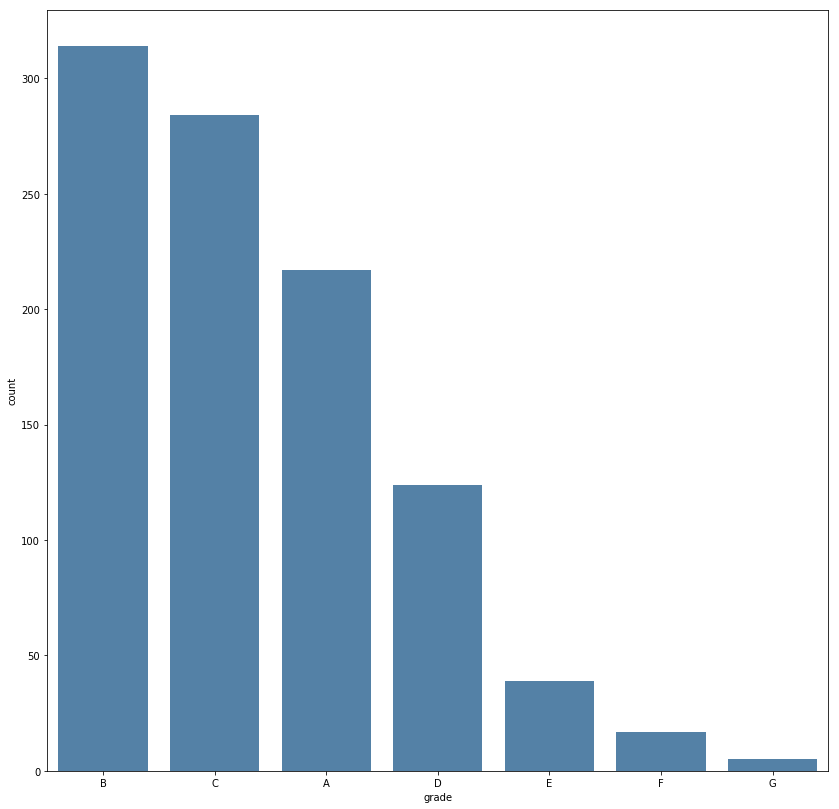

In [36]:
sns.countplot(x=df['grade'], data = df, color= 'steelblue',  order = df['grade'].value_counts().index )

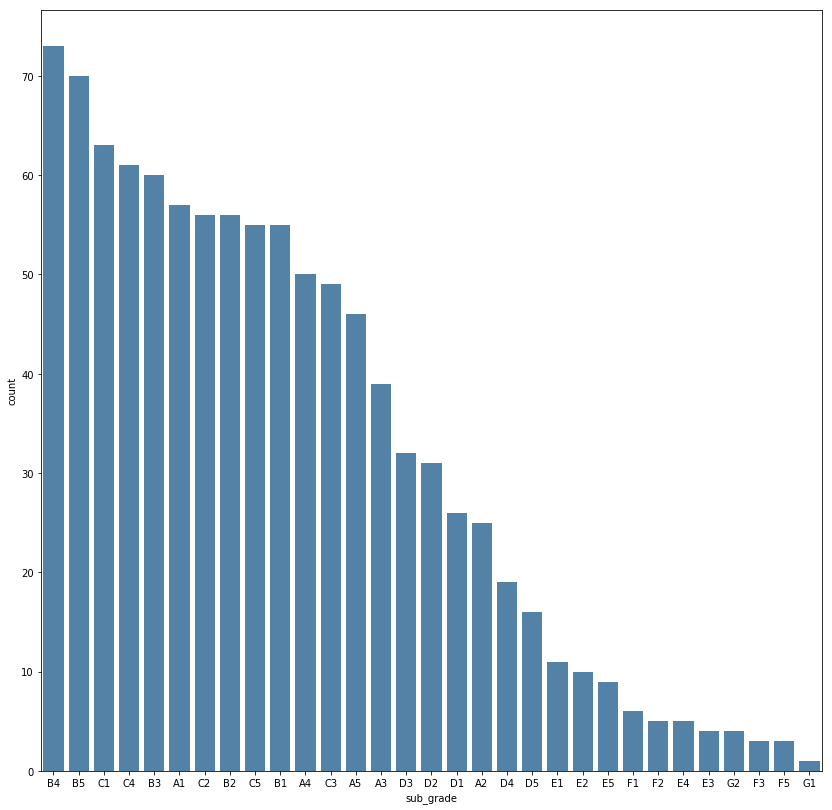

In [37]:
plt.rcParams['figure.figsize']=14,14
sns.countplot(x=df['sub_grade'], data = df, order = df['sub_grade'].value_counts().index,
             color='steelblue')

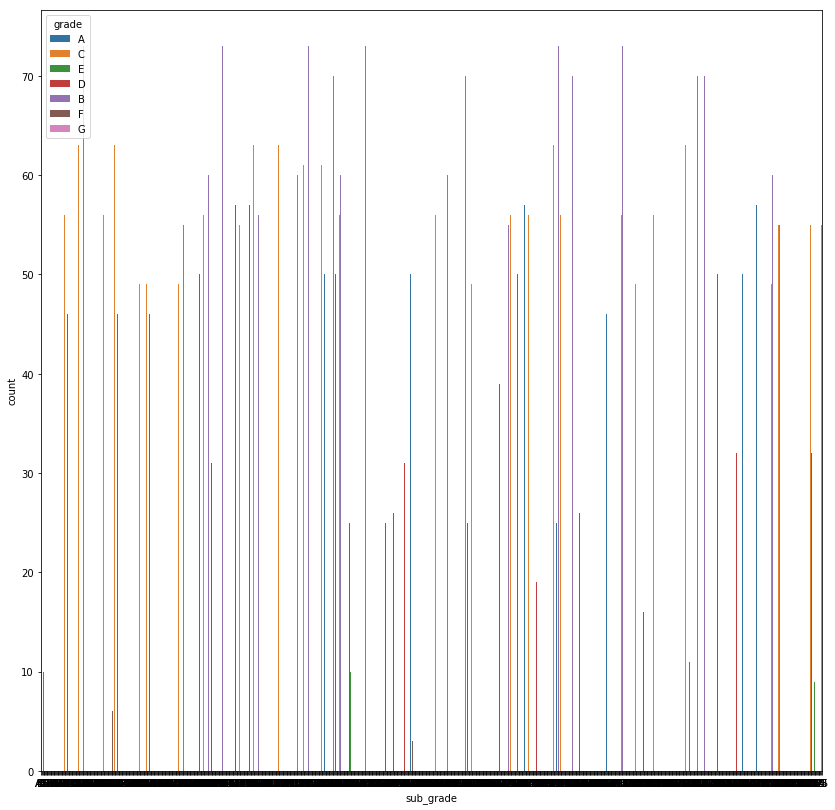

In [52]:
plt.rcParams['figure.figsize']=14,14
sns.countplot(x=df['sub_grade'],
              data = df,
              order = df['sub_grade'],
              hue=df['grade'],
              )
# LPM lo quiero ordenar por orden de etiqueta XXXXXXXXXXXXXXXXXX

In [65]:
# Esto es la cuota (pago mensual))
print("minima ")
display(df['installment'].min())

print("máxima ")
display(df['installment'].max())

print("media")
display(df['installment'].mean())

minima 


32.5

máxima 


1447.31

media


459.3082399999999

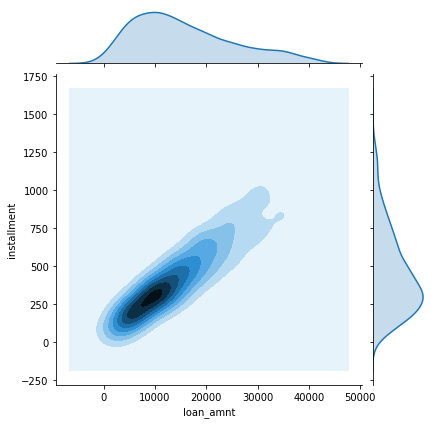

In [66]:
sns.jointplot(x=df['loan_amnt'], y=df['installment'], data=df, kind="kde")


Está correlacionado en forma lineal.

In [71]:
# Esto es el ratio Deuda-a-Ingresos
print("minima ")
display(df['dti'].min())

print("máxima ")
display(df['dti'].max())

print("media")
display(df['dti'].mean())

minima 


0.28

máxima 


747.13

media


18.83410410410408

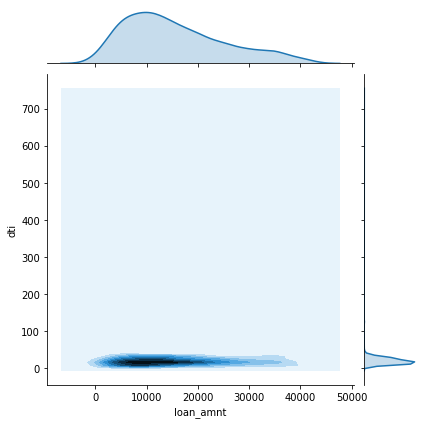

In [73]:
sns.jointplot(x=df['loan_amnt'], y=df['dti'], data=df, kind="kde")

Tengo outliers fuertes en DTI

In [84]:
(df['dti']).round().value_counts()

11.0     56
17.0     52
16.0     47
10.0     46
14.0     45
18.0     45
13.0     44
19.0     40
21.0     38
26.0     36
15.0     35
20.0     35
12.0     34
9.0      32
25.0     32
7.0      30
22.0     29
23.0     29
29.0     27
27.0     25
8.0      23
24.0     22
30.0     20
31.0     18
5.0      18
28.0     16
33.0     15
6.0      14
32.0     14
4.0      12
3.0      11
34.0     10
1.0       9
2.0       9
35.0      6
37.0      5
36.0      3
38.0      3
41.0      2
40.0      2
0.0       2
146.0     1
44.0      1
42.0      1
46.0      1
48.0      1
39.0      1
125.0     1
747.0     1
Name: dti, dtype: int64

In [88]:
df2 = df[df.loc[:,'dti']< 50]

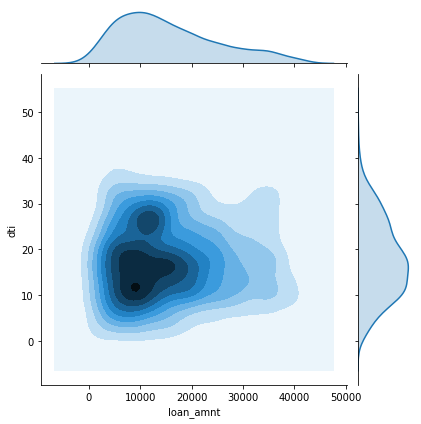

In [89]:
sns.jointplot(x=df2['loan_amnt'], y=df2['dti'], data=df, kind="kde")

Ahora podemos ver la distribución y la relación con el monto del crédito.

In [91]:
# Esto es cuantas líneas de crédito tiene el tomador
print("minima ")
display(df['open_acc'].min())

print("máxima ")
display(df['open_acc'].max())

print("media")
display(df['open_acc'].mean())

minima 


1.0

máxima 


37.0

media


11.38

In [92]:
#Esto es el tiempo, en su empleo actual, del tomador
df['emp_length'].value_counts()

10+ years    336
2 years      103
3 years       98
< 1 year      85
1 year        69
4 years       56
5 years       44
6 years       40
7 years       39
8 years       32
9 years       27
Name: emp_length, dtype: int64

Este campo va a requerir transformar el string en numérico

#### 4.2: Features Categóricos

- emp_title
- home_ownership
- verification_status
- purpose
- application_type

In [41]:
df['emp_title'].value_counts()

Teacher                                     21
Manager                                     16
Owner                                       13
Sales                                       12
Driver                                      10
Director                                     6
RN                                           6
Project Manager                              5
Registered Nurse                             5
General Manager                              5
Vice President                               4
Supervisor                                   4
teacher                                      4
Registered nurse                             4
Sales Manager                                4
owner                                        4
Analyst                                      4
Controller                                   4
Warehouse Manager                            3
registered nurse                             3
Finance Manager                              3
Realtor      

Este feature es importante, pero difícil de trabajar por la cantidad de valores distintos, y el "long tail" de puestos con pocas ocurrencias.
Podemos evaluar la interacción con annual_income.

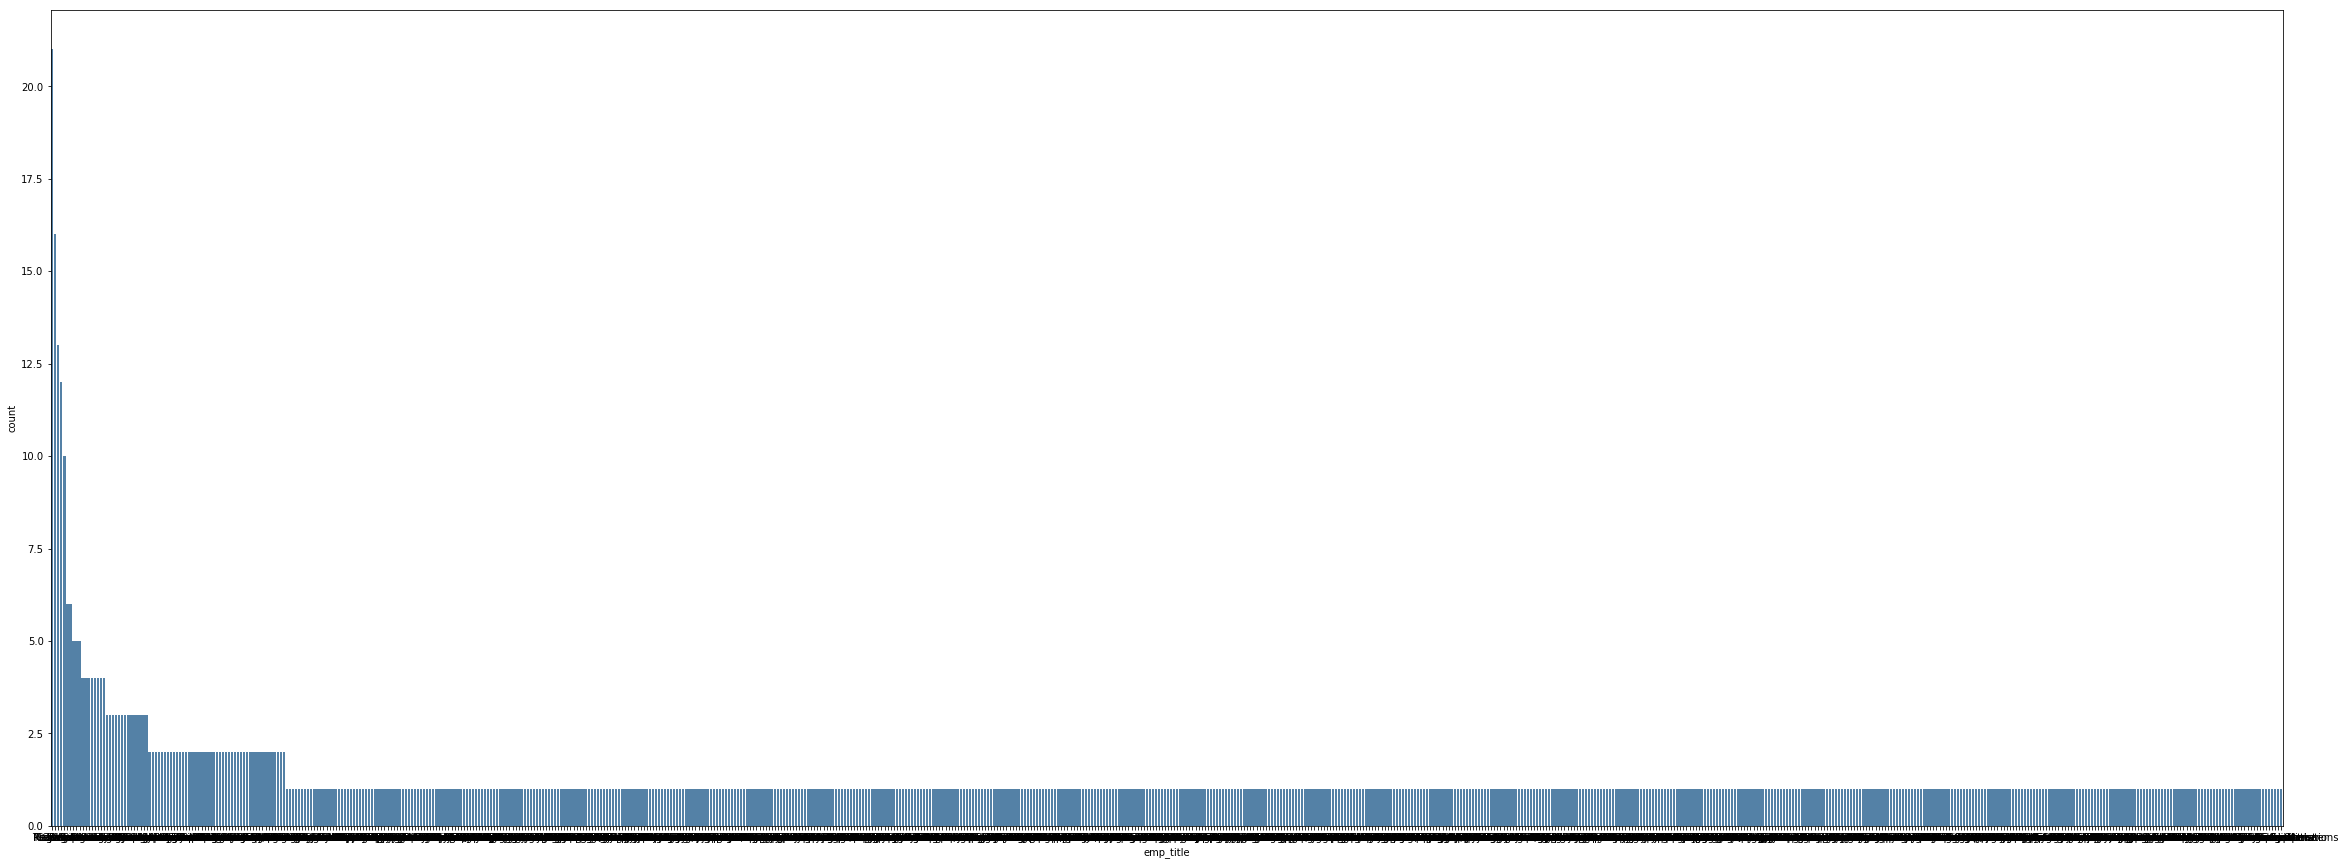

In [44]:
# Ajustar visualización XXXXXXXXXXXXXXXXXXXXXXX
plt.rcParams['figure.figsize']=40,15
sns.countplot(x=df['emp_title'], data = df, order = df['emp_title'].value_counts().index,
             color='steelblue')

In [45]:
df['home_ownership'].value_counts()

MORTGAGE    507
RENT        393
OWN          99
ANY           1
Name: home_ownership, dtype: int64

In [46]:
df['verification_status'].value_counts()

Source Verified    366
Not Verified       348
Verified           286
Name: verification_status, dtype: int64

In [47]:
df['purpose'].value_counts()

debt_consolidation    549
credit_card           244
home_improvement       71
other                  64
major_purchase         26
medical                12
car                    11
small_business          9
house                   5
moving                  5
vacation                3
wedding                 1
Name: purpose, dtype: int64

In [48]:
df['application_type'].value_counts()

Individual    947
Joint App      53
Name: application_type, dtype: int64

#### 4.3 Tratamiento de datos

Nulos

estado de credito

El resto de las columnas

ordenar por alfabético

pairplot de featues

Hasta acá tenemos identificados los features que queremos usar. Vamos a eliminar las columnas innecesarias, y adoptar estrategias para gestionar los features categóricos.

We´ll use a quick visualization tool from Seaborn: Pairwise relationships with  ```pairplot()``` (((BORRADOR))

In [103]:
df3 = df[['loan_amnt','int_rate']]

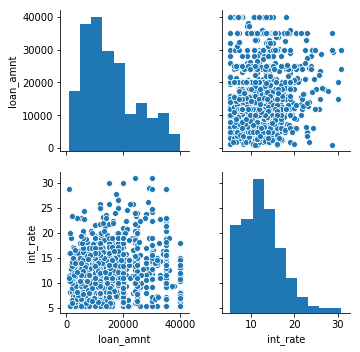

In [104]:
sns.pairplot(df3)

## Paso 2: Data Cleaning y Transformaciones

Posibles pasos:
Dropear las columnas con muchos NaNs,
Dropear las filas con créditos que no estén terminados

Eliminar caracteres de features numéricos (como emp_length)

One Hot Encoding de Categóricas

